# Setup

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Import Data

In [34]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Preview the dataset

In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [36]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [37]:
#Convert True/False to 1/0
data_train['Transported'] = data_train['Transported'].astype(int)

In [38]:
#Get the categorical data
df_cat = data_train[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP','Name','Transported']]
#Get the numerical data
df_num = data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

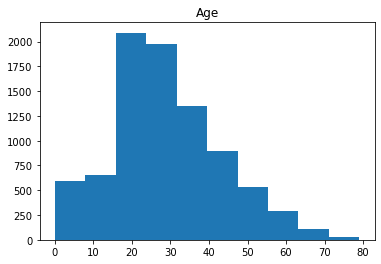

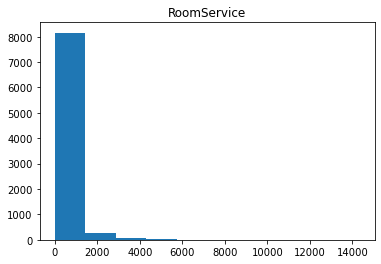

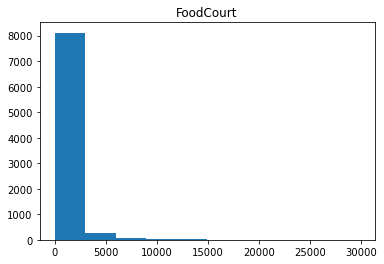

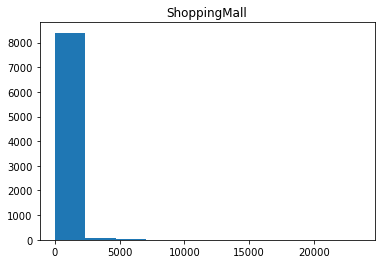

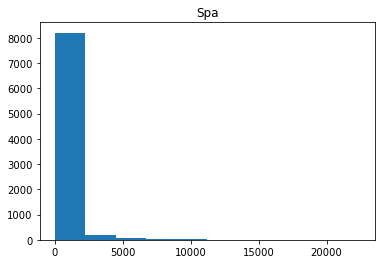

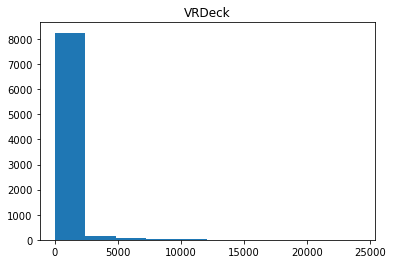

In [39]:
# Distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


<AxesSubplot:>

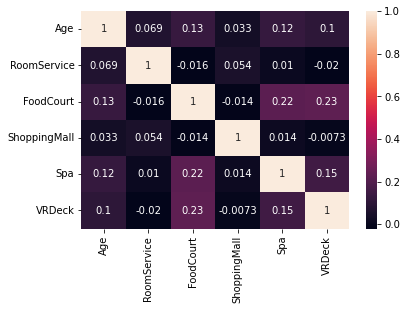

In [40]:
#Compute pairwise correlation of columns
print(df_num.corr())
#Create the heatmap based on the correlation
sns.heatmap(data = df_num.corr(), annot = True)

In [41]:
pd.pivot_table(data_train, index = 'Transported', values = df_num.columns)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
0,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
1,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


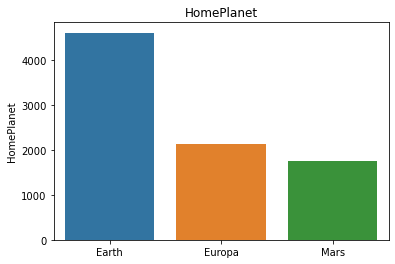

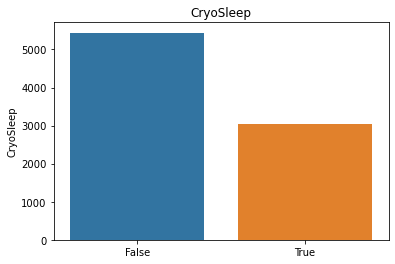

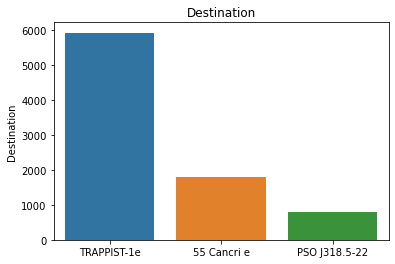

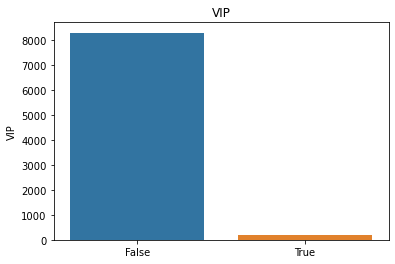

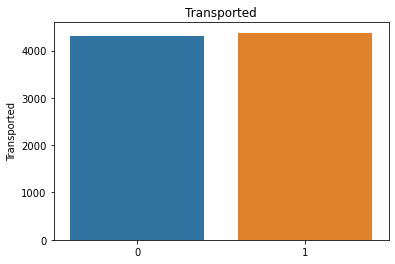

In [42]:
for i in df_cat.columns.drop(['PassengerId','Name','Cabin']):
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [43]:
print(pd.pivot_table(data_train, index = 'Transported', columns='VIP', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='Destination', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='CryoSleep', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='HomePlanet', values= 'PassengerId', aggfunc='count'))

VIP          False  True
Transported             
0             4093   123
1             4198    76

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
0                    702            395         3128
1                   1098            401         2787

CryoSleep    False  True
Transported             
0             3650   554
1             1789  2483

HomePlanet   Earth  Europa  Mars
Transported                     
0             2651     727   839
1             1951    1404   920


# Feature Engineering

In [44]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [45]:
data_train[['Deck', 'Num', 'Side']] = (
    data_train['Cabin'].str.split('/', expand= True)
)

data_train[['Group','GroupNumber']] = (data_train['PassengerId'].str.split('_', expand=True))

In [46]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,0004,01


In [47]:
data_train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

# Data Preprocessing

In [48]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,0004,01


In [70]:
missing_values_count = data_train.isnull().sum()
total_cells = np.product(data_train.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
percent_missing

1.2956583336865113

In [50]:
le = LabelEncoder()
data_train['Deck'] = le.fit_transform(data_train['Deck'])
data_train['Side'] = le.fit_transform(data_train['Side'])
data_train['HomePlanet'] = le.fit_transform(data_train['HomePlanet'])
data_train['Group'] = le.fit_transform(data_train['Group'])
data_train['Destination'] = le.fit_transform(data_train['Destination'])

In [51]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Group,GroupNumber
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0,0,0,01
1,0002_01,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,5,0,1,1,01
2,0003_01,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,0,1,2,01
3,0003_02,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,0,1,2,02
4,0004_01,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,5,1,1,3,01


In [52]:
scaler = MinMaxScaler()
data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = scaler.fit_transform(data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [63]:
X_train = data_train.copy()
y_train = X_train.pop('Transported')
X_train = X_train[['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','Group']]

In [81]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index)

In [82]:
X_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

# Model building

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74985624 0.73030477 0.7239793  0.73130035 0.74683544]
0.7364552197571319
